In [1]:
#import libraries for pre-processing
from __future__ import print_function
import pandas as pd
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.graph_objects as go
#import plotly.express as px
#from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [2]:
crop = pd.read_csv('../Processed_data for crop prediction/Crop_recommendation.csv')
crop.head(1200)

,N,P,K,temperature,humidity,ph,rainfall,label
0,60,35,41,20.879744,82.002744,6.502985,202.935536,rice
1,89,48,39,21.770462,80.319644,7.038096,226.655537,rice
2,67,43,35,23.004459,82.320763,7.840207,263.964248,rice
3,84,47,40,26.491096,80.158363,6.980401,242.864034,rice
4,76,35,37,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1195,34,39,33,31.484517,48.779263,4.525722,93.172220,mango
1196,35,19,34,27.698193,51.415932,5.403908,100.772070,mango
1197,40,36,30,30.412358,52.481006,6.621624,93.923759,mango
1198,19,40,27,32.177520,54.013527,6.207496,91.887661,mango


In [3]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,91,26,25,26.774637,66.413269,6.780064,177.774507,coffee
2196,80,33,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,100,30,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,113,39,27,26.272418,52.127394,6.758793,127.175293,coffee
2199,84,33,27,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.483182,53.642273,48.230000,25.616244,71.481779,6.469480,103.463655
std,37.255343,32.472267,50.609112,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,29.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,85.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
crop.size

17600

In [8]:
crop.shape

(2200, 8)

In [9]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
crop['label'].nunique()

22

In [11]:
crop['label'].value_counts()

cotton         100
chickpea       100
mango          100
lentil         100
grapes         100
muskmelon      100
coffee         100
papaya         100
mungbean       100
blackgram      100
mothbeans      100
apple          100
banana         100
coconut        100
pigeonpeas     100
orange         100
pomegranate    100
kidneybeans    100
rice           100
watermelon     100
jute           100
maize          100
Name: label, dtype: int64

# Feature selection

In [12]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [13]:
acc = []
model = []

### Train-Test Split Data

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(random_state=2)

Log.fit(x_train,y_train)

predicted_values = Log.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression Accuracy is:  0.9545454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.89      0.85      0.87        20
      grapes       1.00      1.00      1.00        18
        jute       0.81      0.93      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      0.96      0.94        23
       maize       0.86      0.90      0.88        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       0.96      1.00      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00     

In [16]:
score = cross_val_score(Log,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.95227273 0.95909091 0.95681818 0.95       0.95909091]


In [17]:
#Print Train Accuracy
lr_train_accuracy = Log.score(x_train,y_train)
print("Training accuracy = ",Log.score(x_train,y_train))
#Print Test Accuracy
lr_test_accuracy = Log.score(x_test,y_test)
print("Testing accuracy = ",Log.score(x_test,y_test))

Training accuracy =  0.9636363636363636
Testing accuracy =  0.9545454545454546


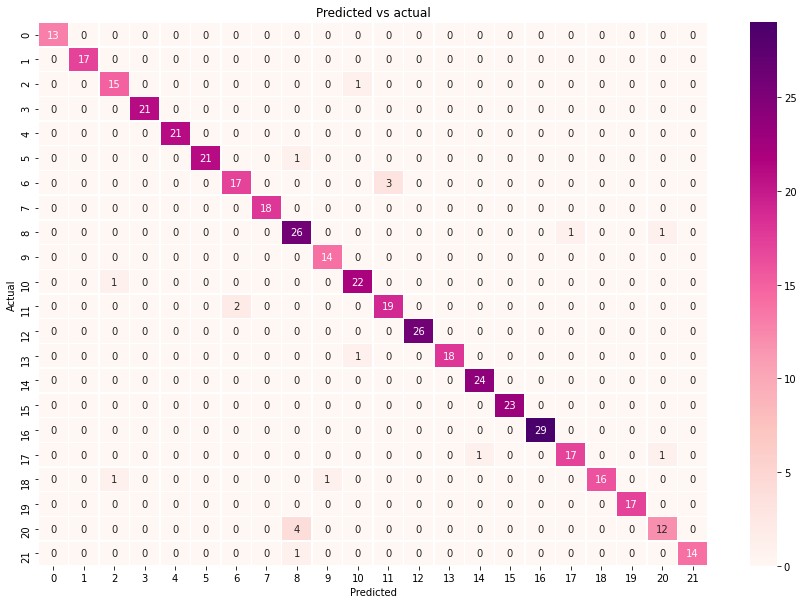

In [18]:
y_pred = Log.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_lr, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
Log_pkl_filename = '../Models for Crop prediction/Logistic Regression.pkl'
# Open the file to save as pkl file
Log_Model_pkl = open(Log_pkl_filename, 'wb')
pickle.dump(Log, Log_Model_pkl)
# Close the pickle instances
Log_Model_pkl.close()

# K-Nearest Neighbors

k- Nearest Neighbors is one of the most basic algorithms used in supervised machine learning. It classifies new data points based on similarity index which is usually a distance metric. It uses a majority vote will classifying the new data. For example, if there are 3 blue dots and 1 dot near the new data point, it will classify it as a blue dot.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.92      0.86      0.89        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [21]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97272727 0.975      0.98409091 0.98181818 0.97727273]


In [22]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9857954545454546
knn_test_accuracy =  0.9795454545454545


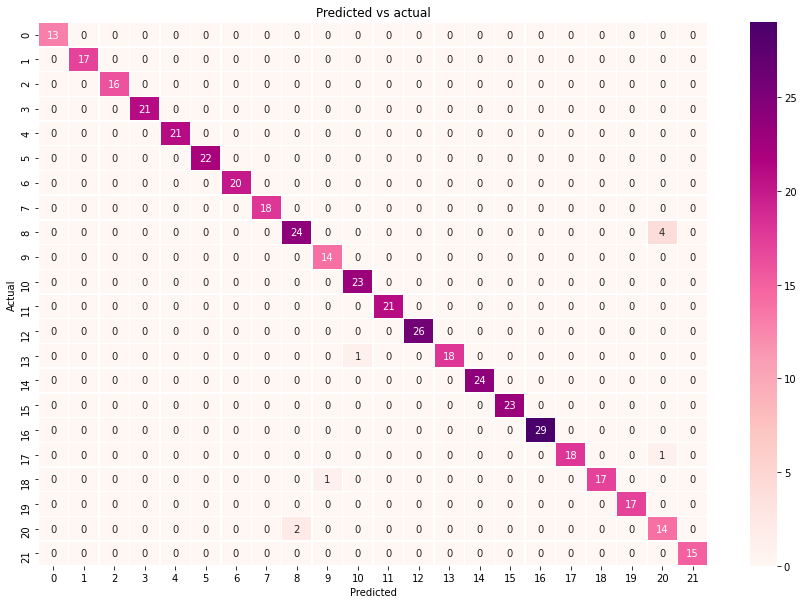

In [23]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

One of the challenges in a KNN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.

In [24]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97272727, 0.96363636, 0.97272727, 0.96136364, 0.97954545,
       0.96818182, 0.97272727, 0.95681818, 0.96136364, 0.95681818,
       0.96136364, 0.95681818, 0.95681818, 0.96136364, 0.96136364,
       0.96136364, 0.96136364, 0.95909091, 0.96136364, 0.95909091])

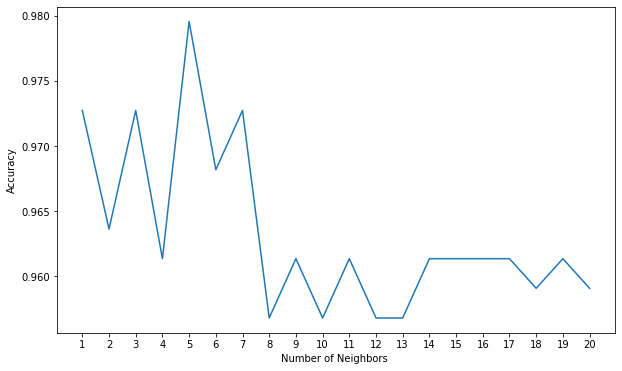

In [25]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

#### There are a range of values from 15 to 17 where the accuracy is the highest.

# Hyperparameter Tuning


#### A hyperparameter is a parameter of the model that is set before the start of learning process. We will use the Exhaustive Grid Search technique for hyperparameter optimization. An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [26]:
from sklearn.model_selection import GridSearchCV

We will use three hyperparamters- n-neighbors, weights and metric.

    1. n_neighbors: Decide the best k based on the values we have computed earlier.
    2. weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
    3. metric: The distance metric to be used will calculating the similarity

In [27]:
grid_params = { 'n_neighbors' : [14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

Since we have provided the class validation score as 3( cv= 3), Grid Search will evaluate the model 5 x 2 x 3 x 3 = 90 times with different hyperparameters.

In [28]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [29]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [30]:
g_res.best_score_

0.9812490188440094

In [31]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}

In [32]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 14, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=14,
                     weights='distance')

In [33]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.975


In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
knn_pkl_filename = '../Models for Crop prediction/KNN.pkl'
# Open the file to save as pkl file
knn_Model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(knn, knn_Model_pkl)
# Close the pickle instances
Log_Model_pkl.close()

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  91.13636363636364
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.86      0.93        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.77      0.95      0.85        21
       mango       1.00      0.96      0.98        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [36]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93409091 0.925      0.91590909 0.91590909 0.92954545]


In [37]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.9323863636363636
Testing accuracy =  0.9113636363636364


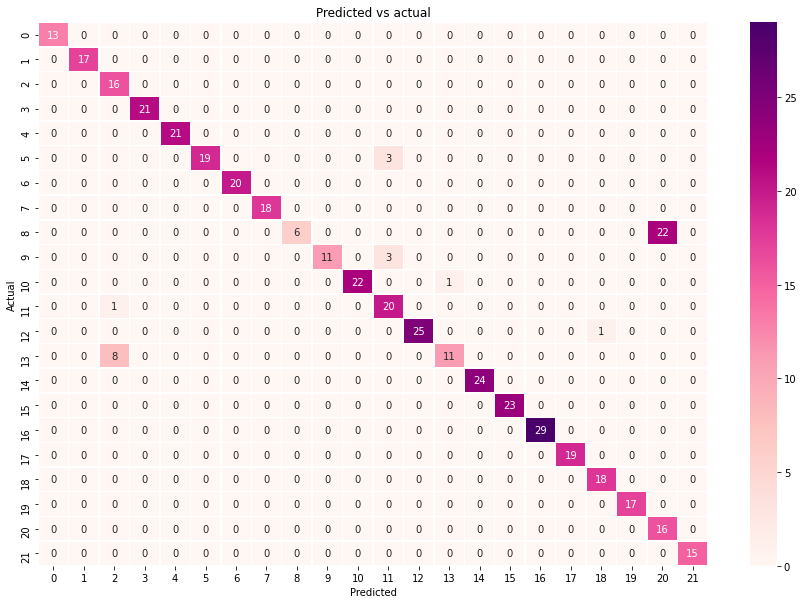

In [38]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../Models for Crop prediction/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DT, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Support Vector Machine

In [40]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')

SVM.fit(x_train,y_train)

predicted_values = SVM.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("Support Vector Machine Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Support Vector Machine Accuracy is:  0.11818181818181818
              precision    recall  f1-score   support

       apple       1.00      0.46      0.63        13
      banana       1.00      0.12      0.21        17
   blackgram       1.00      0.25      0.40        16
    chickpea       1.00      0.05      0.09        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.22      0.36        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       1.00      0.05      0.10        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       1.00      0.26      0.41        23
      orange       0.00 

In [41]:
score = cross_val_score(SVM,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.27272727 0.29545455 0.26590909 0.275      0.25227273]


In [42]:
#Print Train Accuracy
svm_train_accuracy = SVM.score(x_train,y_train)
print("Trainig accuracy = ",SVM.score(x_train,y_train))
#Print Test Accuracy
svm_test_accuracy = SVM.score(x_test,y_test)
print("Testing accuracy = ",SVM.score(x_test,y_test))

Trainig accuracy =  1.0
Testing accuracy =  0.11818181818181818


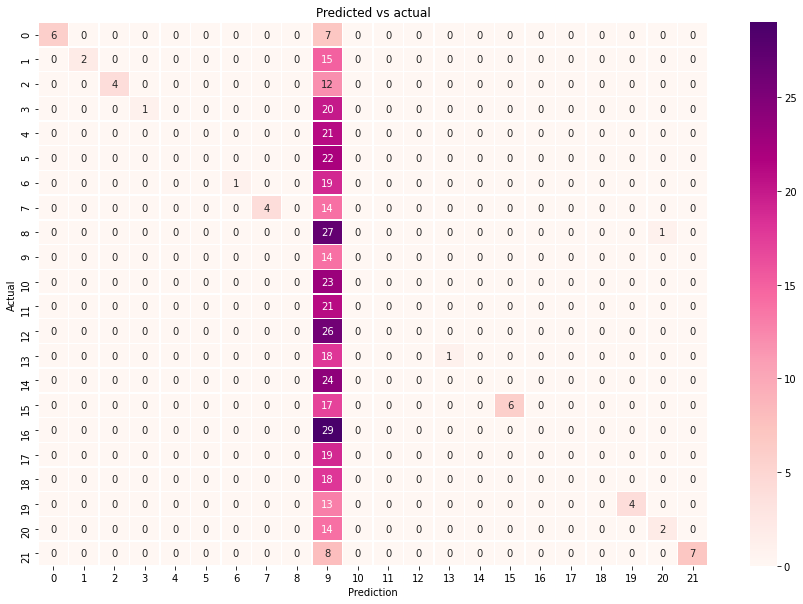

In [43]:
y_pred = SVM.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [45]:
RF.predict([[50,50,50,42,80,7,250]])

array(['papaya'], dtype=object)

In [46]:
RF.predict([[91,26,25,26.774637,66.413269,6.780064,177.774500]])

array(['coffee'], dtype=object)

In [47]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99318182 0.99318182]


In [48]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


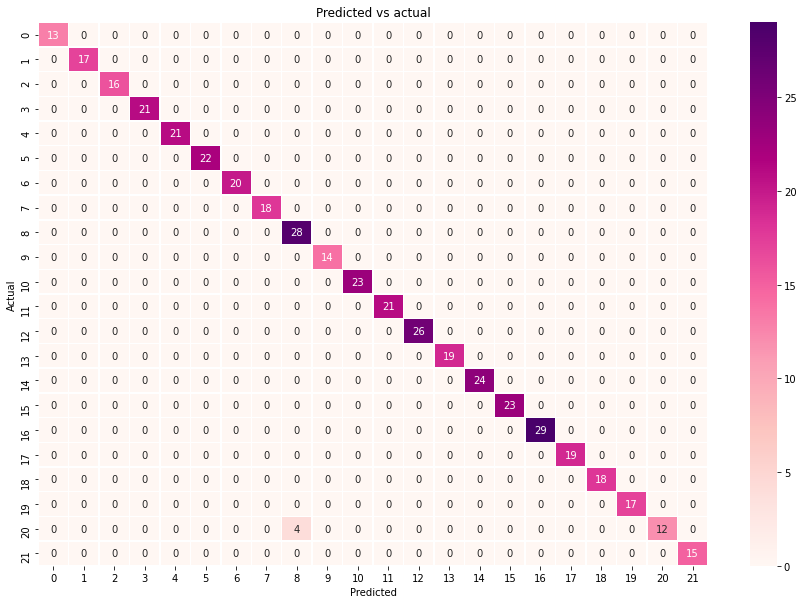

In [49]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [50]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../Models for Crop prediction/Random Forest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [52]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99318182 0.99318182 0.99318182 0.98863636]


In [53]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.9886363636363636


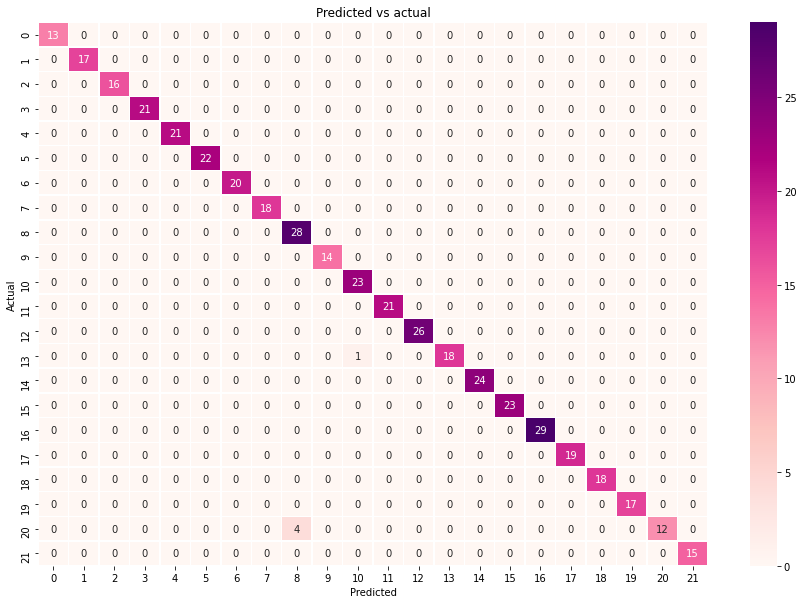

In [54]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [55]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../Models for Crop prediction/Naive Bayes Classifiers.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# eXtreme Gradient Boosting (XGBoost)

In [60]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

[08:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.89      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23

In [61]:
score = cross_val_score(XB,features,target,cv=5)
print('Cross validation score: ',score)

[08:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [62]:
#Print Train Accuracy
XB_train_accuracy = XB.score(x_train,y_train)
print("Training accuracy = ",XB.score(x_train,y_train))
#Print Test Accuracy
XB_test_accuracy = XB.score(x_test,y_test)
print("Testing accuracy = ",XB.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9886363636363636


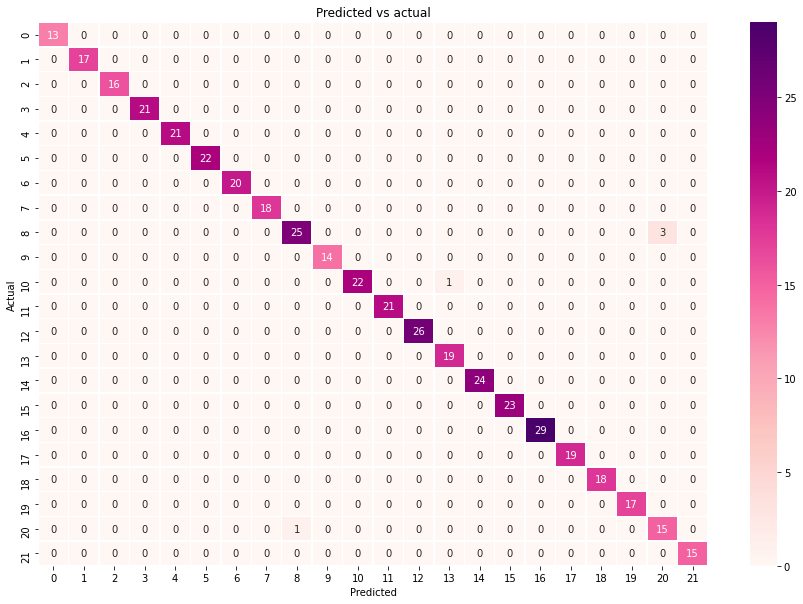

In [63]:
y_pred = XB.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [64]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../Models for Crop prediction/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# ML Classification accuracy comparison

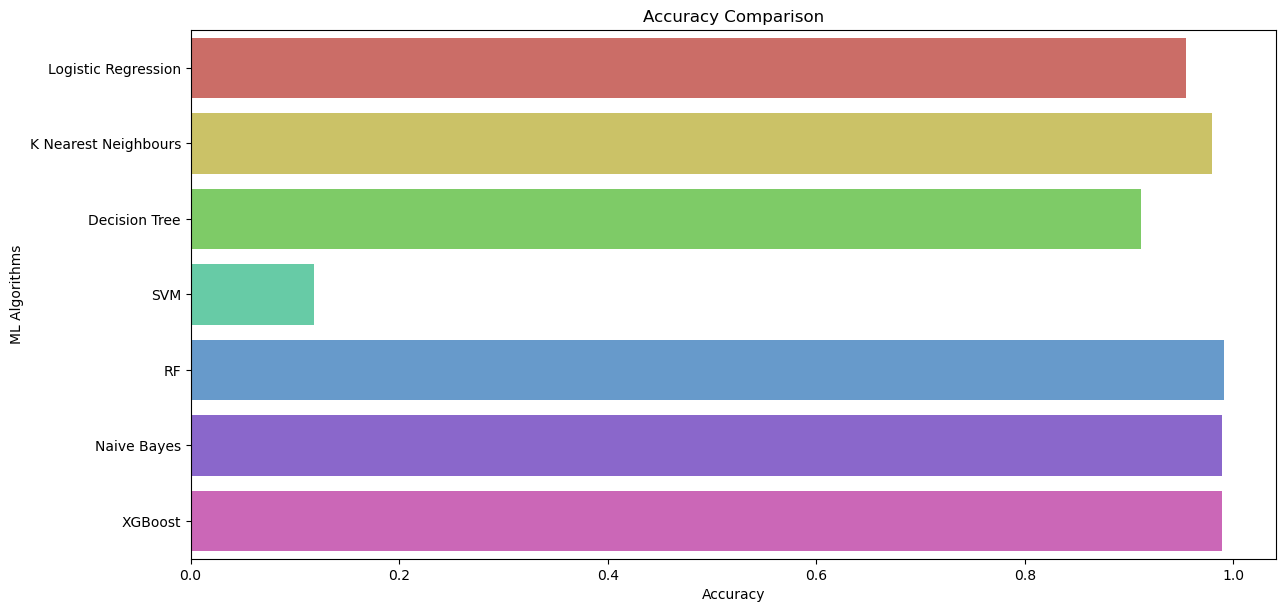

In [65]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='hls')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')


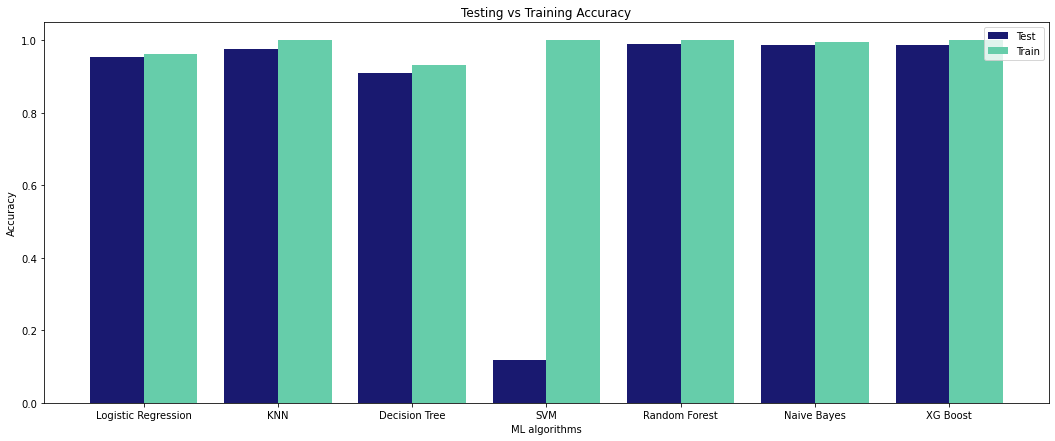

In [66]:
label = ['Logistic Regression','KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Naive Bayes',
         'XG Boost']
Test = [lr_test_accuracy,knn_test_accuracy, dt_test_accuracy, svm_test_accuracy, rf_test_accuracy,
        nb_test_accuracy, XB_test_accuracy]
Train = [lr_train_accuracy ,knn_train_accuracy,  dt_train_accuracy, svm_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(18,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.savefig('train vs test.png')
plt.show()

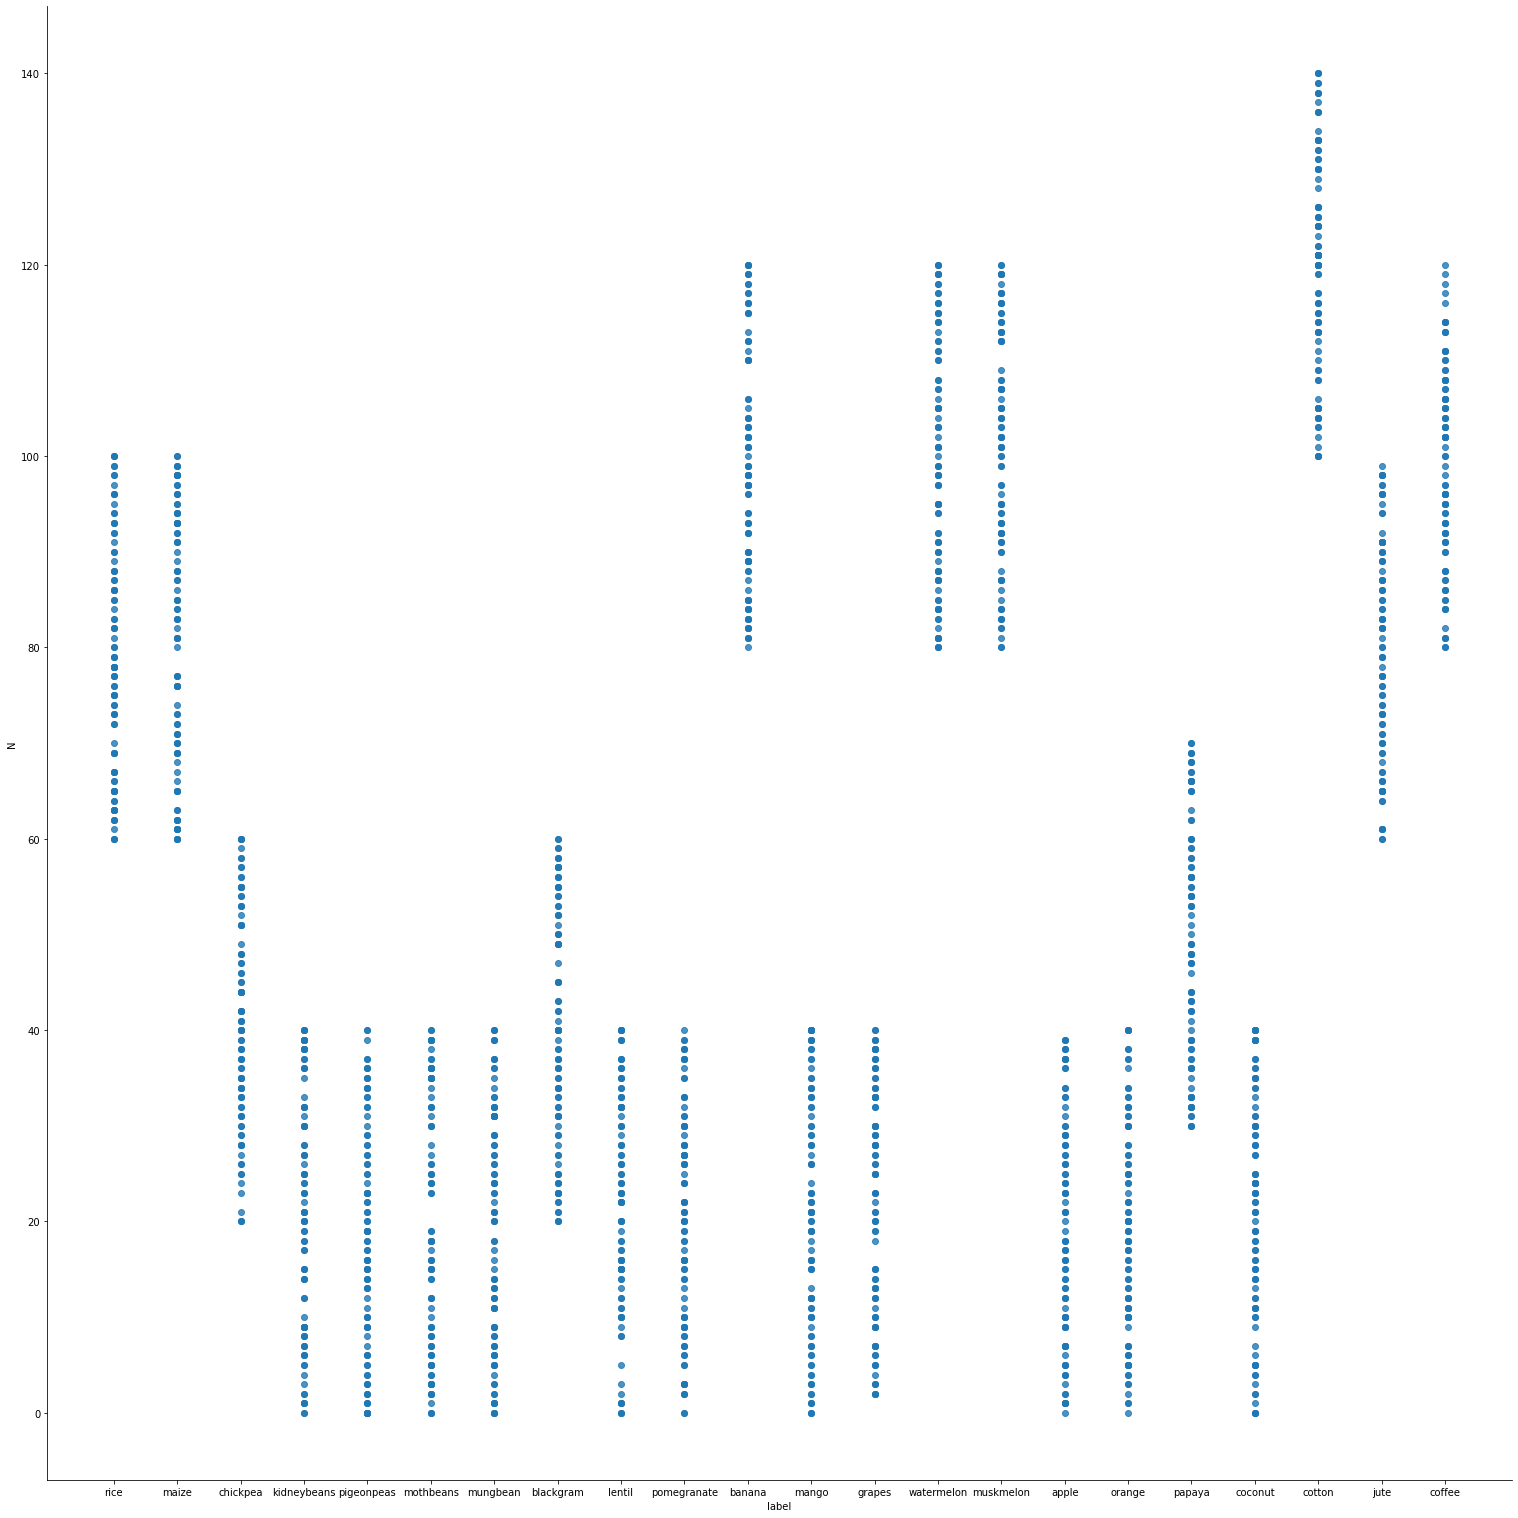

In [67]:
sns.lmplot(x='label', y='N',
           fit_reg=False, data=crop,size=21)

## Data set link: - https://www.kaggle.com/atharvaingle/crop-recommendation-dataset